# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. This Question involves the use of simple linear regression on Auto data set.

In [0]:
auto = pd.read_csv('/content/drive/My Drive/Repos/Git/Statistics-Basics/An Introduction to Statistical Learning/Dataset/Auto.csv')

In [3]:
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [0]:
auto.horsepower.replace('?',np.nan,inplace=True)
auto.dropna(inplace=True)

In [0]:
auto.horsepower = auto.horsepower.astype(np.int64)

In [6]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

- Lets take the mpg as the response variable.
- Lets take the Horsepower as the predictor variable.

### (A) Perform a simple linear regression with mpg as the response and the horsepower as the predictor.Use the summary() function to print the results and state down your Observations.

In [0]:
import statsmodels.formula.api as smf

In [8]:
lm = smf.ols('mpg~horsepower',data=auto).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           7.03e-81
Time:                        06:52:11   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

**Observation**
- The horsepower predictor is significant.
- the R-square value is 0.606.
- Durbin-Watson is not close to 2, we might have collinearity issues.

#### ***i. Is there a relationship between the predictor and response?***

- Yes, the horsepower predictor is sigificant for the given linear model.
- The p-values of the t-statistic, is less than significant values and hence the predictor is significant.

#### ***ii.How strong is the relationship between the predictor and the response?***

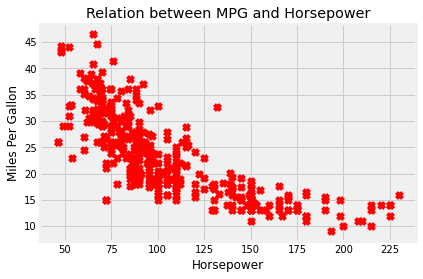

In [9]:
plt.scatter(x=auto.horsepower,y=auto.mpg,marker='x',c='r')
plt.title('Relation between MPG and Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon')
plt.show()

In [10]:
auto.mpg.corr(auto.horsepower)

-0.7784267838977756

- The correlation between the mpg and horsepower is strong.

#### ***iii.Is the relationship between the predictor and response positive or negative?***

- The relationship between the predictor and the response is strongly negative.

####***iv.What is the predicted mpg associated with horsepower of 98? What are the associated 95% confidance and prediction intervals?***

In [0]:
horsepower_ = pd.DataFrame(data=np.array([98]),columns=['horsepower'])

In [0]:
summary_details = lm.get_prediction(horsepower_)

In [13]:
print(f'Predicted Miles Per Gallon for Horsepower 98 is {summary_details.predicted_mean}')
print(f'Confidance Interval{summary_details.conf_int()}')
print(f'Prediction Interval{summary_details.var_pred_mean}')

Predicted Miles Per Gallon for Horsepower 98 is [24.46707715]
Confidance Interval[[23.97307896 24.96107534]]
Prediction Interval[0.06313277]


### (B) Plot the response and the predictor. Display the least squares regression line.

In [0]:
pred_mpg = lm.predict(auto.horsepower)

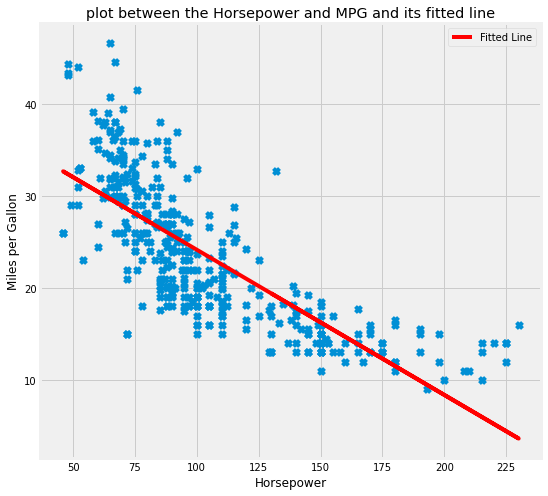

In [15]:
plt.figure(figsize=(8,8))
plt.title('plot between the Horsepower and MPG and its fitted line')
plt.scatter(x=auto.horsepower,y=auto.mpg,marker='x')
plt.plot(auto.horsepower,pred_mpg,c='r',label='Fitted Line')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.legend(loc='best')
plt.show()

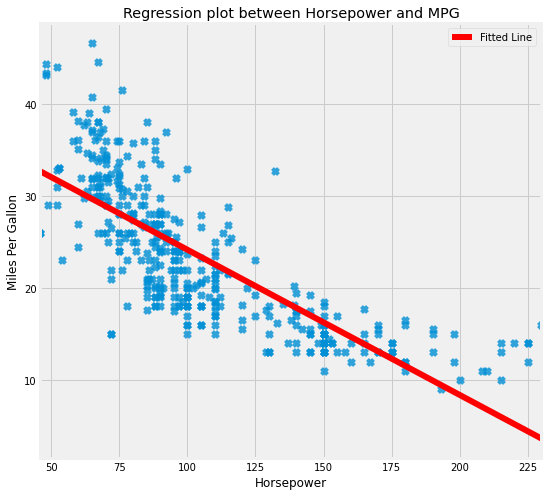

In [16]:
plt.figure(figsize=(8,8))
sns.regplot(x=auto.horsepower,y=auto.mpg,lowess=False,ci=None,marker='x',line_kws={'color':'r','label':'Fitted Line'},order=1)
plt.title('Regression plot between Horsepower and MPG')
plt.xlabel('Horsepower')
plt.legend(loc='best')
plt.ylabel('Miles Per Gallon')
plt.show()

### (C) Produce Diagnostic plots of the least square regression fit.Comment on any problems you see with the fit.

In [0]:
# Fitted Data
model_fitted_y = lm.fittedvalues
# Model residual values
model_residuals = lm.resid
# Standardized residuals
model_norm_residuals = lm.get_influence().resid_studentized_internal
# Model_residual_sqrt_abs
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

***Linearity in Data***

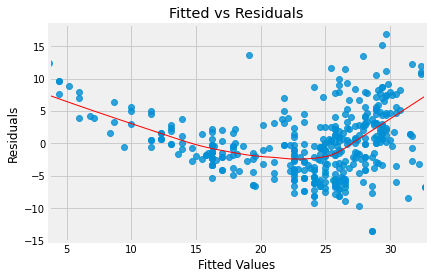

In [18]:
# Fitted vs Residuals
plt.title('Fitted vs Residuals')
sns.regplot(x=model_fitted_y,y=model_residuals,lowess=True,scatter=True,line_kws={'color':'r','lw':1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

**Observation:**
- From the plot, we can observe that the model doesn't fit the data.

***QQ plot or Prob plot***

In [0]:
import scipy.stats as stats

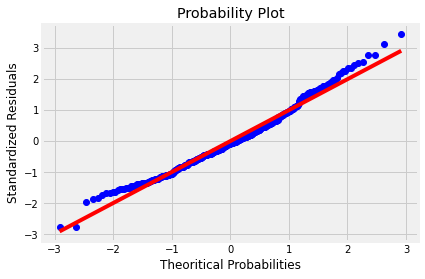

In [20]:
plt.title('Prob Plot')
stats.probplot(x=model_norm_residuals,plot=plt)
plt.xlabel('Theoritical Probabilities')
plt.ylabel('Standardized Residuals')
plt.show()

**Observation:**
- A lot of observations aren't close to the red line.
- The residuals isn't normalized, hence the data isn't normalized.

***Scale-Location plot***

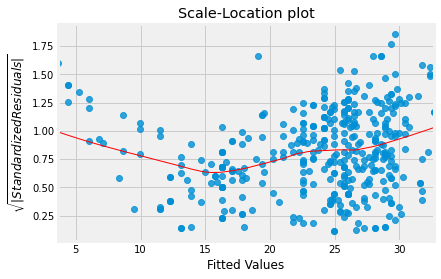

In [21]:
plt.title('Scale-Location plot')
sns.regplot(x=model_fitted_y,y=model_norm_residuals_abs_sqrt,lowess=True,scatter=True,line_kws={'color':'r','lw':1},ci=False)
plt.xlabel('Fitted Values')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$')
plt.show()

**Observation:**
- The residuals shows a funnel kind of variance.
- The residuals are not homoscedastic.

***Residuals vs Leverage plot***

In [0]:
# Model Leverage
model_leverage = lm.get_influence().hat_matrix_diag
# Cooks Distance
model_cook_distance = lm.get_influence().cooks_distance[0]

In [0]:
# Helper Graph
def graph(formula, x_range, label=None):
  x = x_range
  y = formula(x)
  plt.plot(x,y,label=label,lw=1,ls='--',color='red')

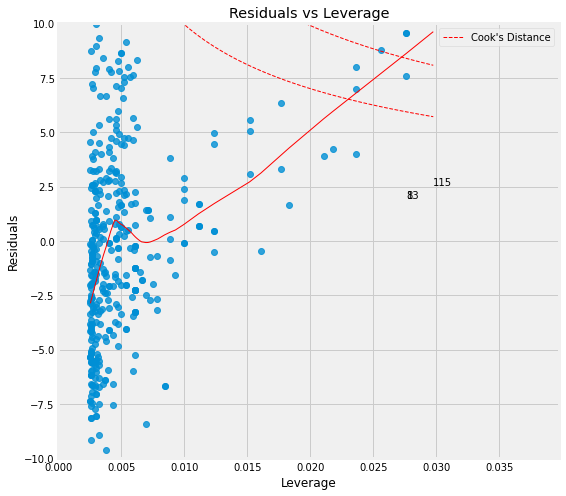

In [24]:
plt.figure(figsize=(8,8))
plt.title('Residuals vs Leverage')
sns.regplot(x=model_leverage,y=model_residuals,lowess=True,scatter=True,line_kws={'color':'r','lw':1})
plt.ylabel('Residuals')
plt.xlabel('Leverage')
plt.xlim(0,max(model_leverage)+0.01)
plt.ylim(-10,10)

# Annotations
leverage_top_3 = np.flip(np.argsort(model_cook_distance,0))[:3]
for i in leverage_top_3:
  plt.annotate(i,xy=(model_leverage[i],model_norm_residuals[i]))

# Cooks Distance
p = len(lm.params)

graph(lambda x:np.sqrt((0.5*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50),'Cook\'s Distance')
graph(lambda x:np.sqrt((1*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50))
plt.legend(loc='best')
plt.show()

**Observation:**
- There is a huge variance in the residual values.
- The leverage is less than 0.05, hence we dont have to remove any outlier
- The Suggested removal of outlier shoudl be the points 115, and maybe that would improve the model.

## 2. This Question involves multiples linear regression on Auto data set.

### (A) Produce a scatter plot matrix of all the variables in the data set.

<Figure size 1440x720 with 0 Axes>

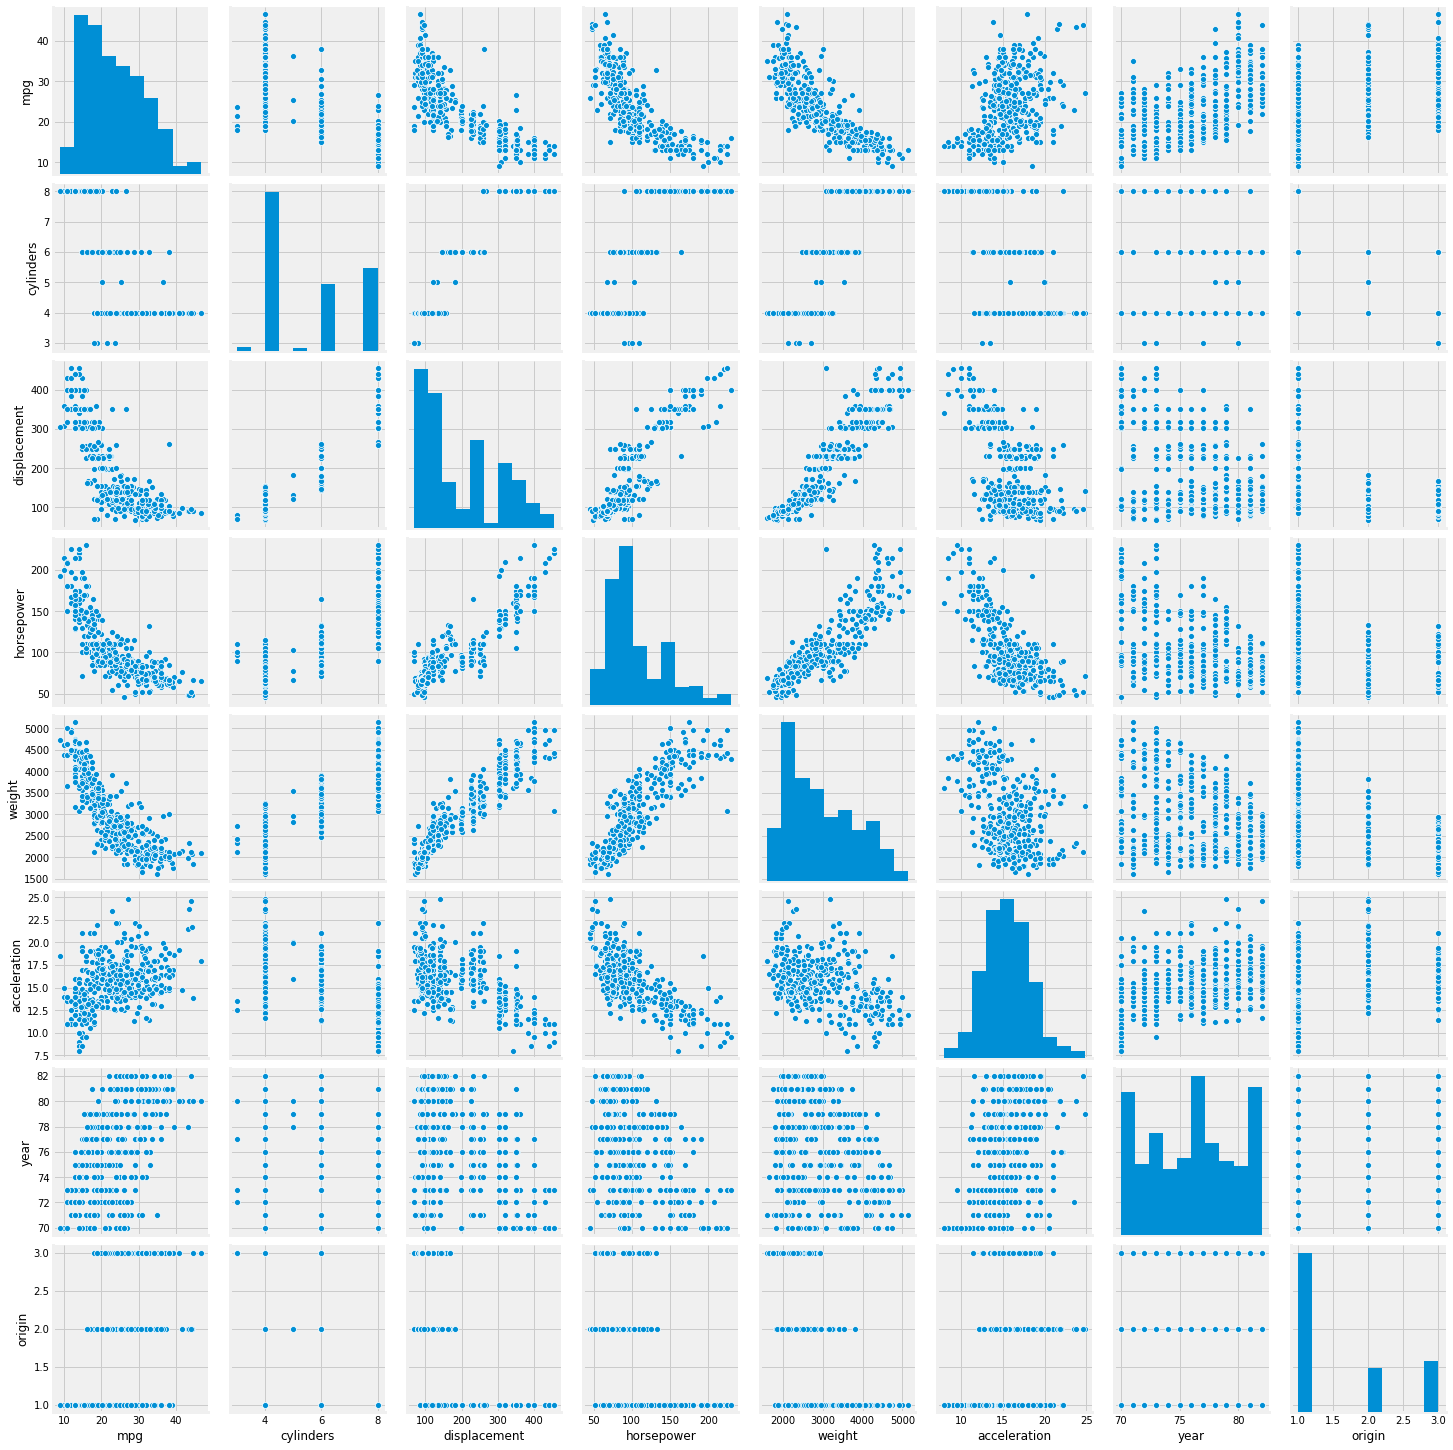

In [25]:
plt.figure(figsize=(20,10))
sns.pairplot(auto)
plt.show()

### (B) Compute the matrix of correaltion between the variables and exclude the qualitative variables

In [26]:
print('Correlation Matrix')
auto.drop('name',1).corr()

Correlation Matrix


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (C) Perform a multiple linear regression with mpg as response and all other variables except name as predictors. Use summary() to print the results.Comment on the output.

In [27]:
lr = smf.ols('mpg ~ '+'+'.join(auto.columns.difference(['mpg','name'])),data=auto).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          2.04e-139
Time:                        06:52:29   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

**Observation:**
- The model is significant.
- The predictors acceleration,cylinders,horsepower are non significant according to the model.
- The model is normally distributed.
- The Durbin-Watson value is 1.3 which is pretty close to 2, which means there is collinearity, but not in huge values.

#### i.Is there a relationship between the predictors and the response varaible?

In [28]:
print('Correlation Matrix')
auto.drop('name',1).corr()

Correlation Matrix


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**Observation:**
- The Cylinder and the Displacement have a strong correlation between the predictors themselves.
- horsepower,cylinder,displacement and weight are strongly related to the response negatively.
- acceleration,year and orgin are positively related to the response.

#### ii.Which predictors appear to have a statistical significance relationship to the response?


- Displacement, Origin, Weight and Year are statistically significant to the response in this model.

#### iii.What does the coeffiecient of the variable year suggest?

- The coeffiencient of the year is 0.7508
- This suggest that the year value increase by 1 unit increase the response by 0.7508 when all other predictors are kept constant.

### (D) Produce Diagnostic plots for the linear regression fit. Comment on any problems, that you observe with the fits.

In [0]:
# Fitted Values
model_fitted_y = lr.fittedvalues
# Model Residuals
model_residuals = lr.resid
# Standardized Residuals
model_norm_residuals = lr.get_influence().resid_studentized_internal
# Sqrt_abs_standardized Residual
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# model_leverage
model_leverage = lr.get_influence().hat_matrix_diag
# Cook
model_cook = lr.get_influence().cooks_distance[0]

***Fitted vs Residuals***

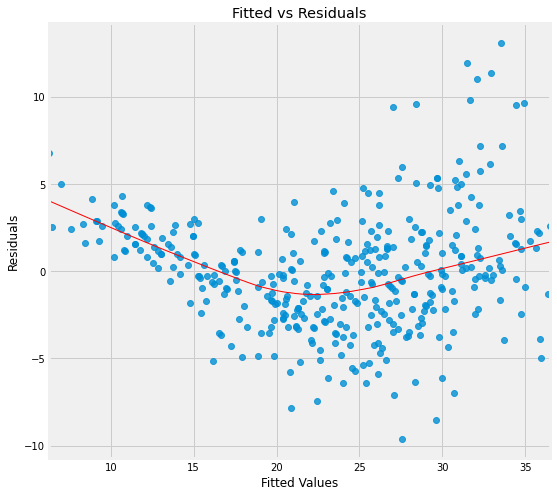

In [30]:
plt.figure(figsize=(8,8))
plt.title('Fitted vs Residuals')
sns.regplot(x=model_fitted_y,y=model_residuals,lowess=True,scatter=True,line_kws={'color':'r','lw':1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

***QQ plot or Prob plot***

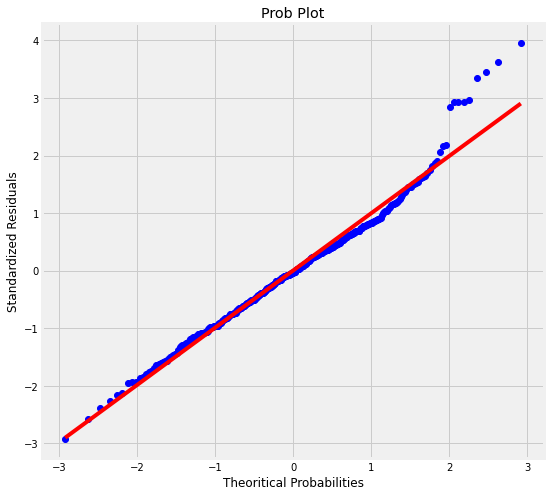

In [31]:
plt.figure(figsize=(8,8))
stats.probplot(x=model_norm_residuals,plot=plt)
plt.xlabel('Theoritical Probabilities')
plt.ylabel('Standardized Residuals')
plt.title('Prob Plot')
plt.show()

***Scale-Location plot***

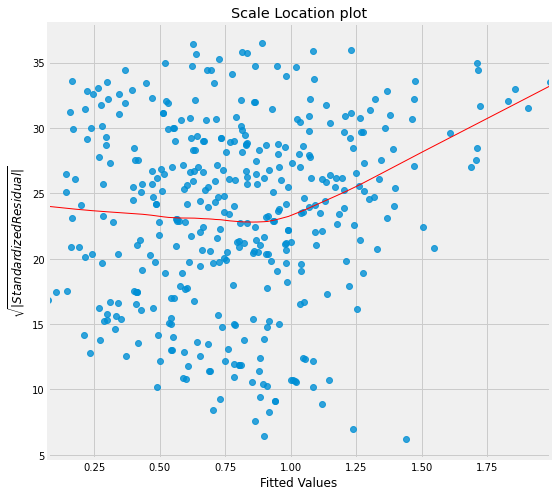

In [32]:
plt.figure(figsize=(8,8))
plt.title('Scale Location plot')
sns.regplot(x=model_norm_residuals_abs_sqrt,y=model_fitted_y,lowess=True,scatter=True,line_kws={'color':'r','lw':'1'})
plt.xlabel('Fitted Values')
plt.ylabel(r'$\sqrt{|Standardized Residual|}$')
plt.show()

***Residuals vs Leverage***

In [0]:
# graphing function
def graph(formula, x_range, label=None):
  x=x_range
  y=formula(x)
  plt.plot(x,y,lw=1,color='red',ls='--',label=label)

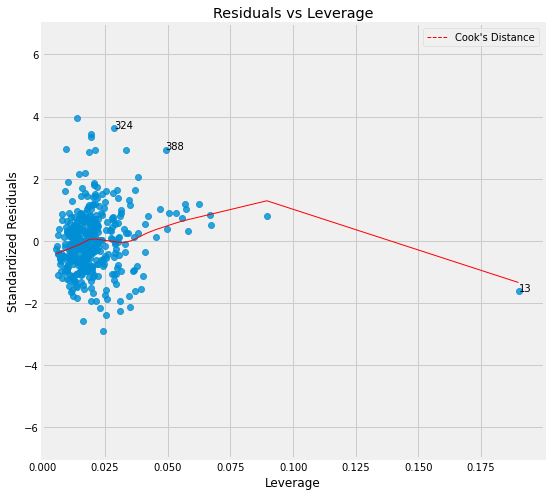

In [34]:
plt.figure(figsize=(8,8))
plt.title('Residuals vs Leverage')
sns.regplot(x=model_leverage,y=model_norm_residuals,lowess=True,scatter=True,line_kws={'color':'r','lw':1})
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.xlim(0,max(model_leverage)+0.01)
plt.ylim(-7,7)

#annotations
leverage_top_3 = np.flip(np.argsort(model_cook,0))[:3]
for i in leverage_top_3:
  plt.annotate(i,xy=[model_leverage[i],model_norm_residuals[i]])

# Cooks Distance
p = len(lr.params)

graph(lambda x:((0.5*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50),'Cook\'s Distance')
graph(lambda x:((0.5*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50))

plt.legend(loc='best')
plt.show()

**Obervation:**
- ***Fitter vs Residual plot***
  - From the pattern observered, a shape similar to that of U is seen. This means that the model is not a good fit for this data.
-***Prob plot***
  - The plotted points are not close to the red line. From this we can observe that the residuals are not normalized, which means that the data is not normalized.
-***Scale Location plot***
  - From the plot it can be observed that it exhibits a U-shape, which means the model is not a proper fit for this data.
  - Also this shows a Non-Constant variance of error terms.
-***Residuals vs Leverage plot***
  - From the plot we can see that the top 3 leverage points are [13,388,324], however only 13 is far.
  - Removing the point 13 can result in a better model.

### (E) Fit linear regression model with interaction effects. Does any interaction appear statistically significant?

In [0]:
auto['mpgl'] = np.log(auto['mpg'])

In [36]:
print('Correlation Matrix')
auto.corr()

Correlation Matrix


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpgl
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.983909
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.826824
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.853691
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.830155
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.875658
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.447574
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.577275
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.560508
mpgl,0.983909,-0.826824,-0.853691,-0.830155,-0.875658,0.447574,0.577275,0.560508,1.000000


In [37]:
lr_i = smf.ols('mpgl~C(cylinders)+horsepower+I(horsepower**2)+acceleration+weight+I(weight**2)+displacement+I(displacement**2)+C(year)+C(origin)+cylinders:displacement+cylinders:horsepower+displacement:horsepower+horsepower:weight',data=auto).fit()
print(lr_i.summary())

                            OLS Regression Results                            
Dep. Variable:                   mpgl   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          3.88e-180
Time:                        06:52:31   Log-Likelihood:                 364.00
No. Observations:                 392   AIC:                            -668.0
Df Residuals:                     362   BIC:                            -548.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

**Observaton:**
- The Cylinder to Horsepower interaction is significant.

***Checking if the model is a decent fit for the data***

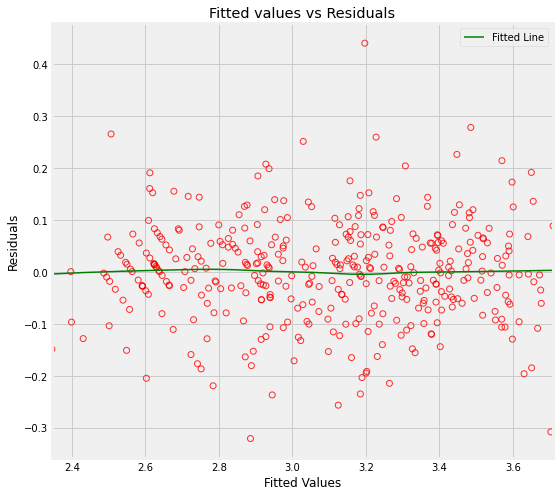

In [38]:
plt.figure(figsize=(8,8))
sns.regplot(x=lr_i.fittedvalues,y=lr_i.resid,lowess=True,line_kws={'color':'green','lw':1.5,'label':'Fitted Line'},scatter=True,scatter_kws={'facecolor':'none','edgecolor':'red'})
plt.title('Fitted values vs Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend(loc='best')
plt.show()

**Observation:**
- The Model is a decent fit for the data.

## 3. This Question should be answered using the Carseats dataset

### (A) Fit multiple regression model to predict Sales using Price, Urban and US.

In [0]:
carseats = pd.read_csv('/content/drive/My Drive/Repos/Git/Statistics-Basics/An Introduction to Statistical Learning/Dataset/Carseats.csv')

In [0]:
carseats.drop('Unnamed: 0',1,inplace=True)

In [41]:
carseats.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


In [42]:
carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [43]:
cs_mlr = smf.ols('Sales~Price+Urban+US',data=carseats).fit()
print(cs_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           2.39e-23
Time:                        06:52:31   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

### (B) Provide an Interpretation for each coefficient in the model.

**Observation:**
- The Significant predictors are US and Price.
- The Urban is not a significant predictor.
- The car sales in US is higher when it is in US.

### (C) Write out the model in equation form

$\hat y = \hat\beta_0+\hat\beta_1\times\text{Price}+\begin{cases}
\hat\beta_2\times\text{Urban}, &\text{when Urban is yes}\\
0, &\text{when Urban is no}
\end{cases}+
\begin{cases}
\hat\beta_3\times\text{US}, &\text{When US is yes}\\
0, &\text{When US is no}
\end{cases}$

### (D) For which of the predictors can you reject the null hypothesis?

- US and Price, we can reject the null hypothesis

### (E) On the basis of previous response, fit a smaller model that only uses predictors for which there is evidence of association with the response.

In [44]:
cs_model = smf.ols('Sales~Price+US',data=carseats).fit()
print(cs_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           2.66e-24
Time:                        06:52:31   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### (F) How well do the models in (A) and (E) fit the data?

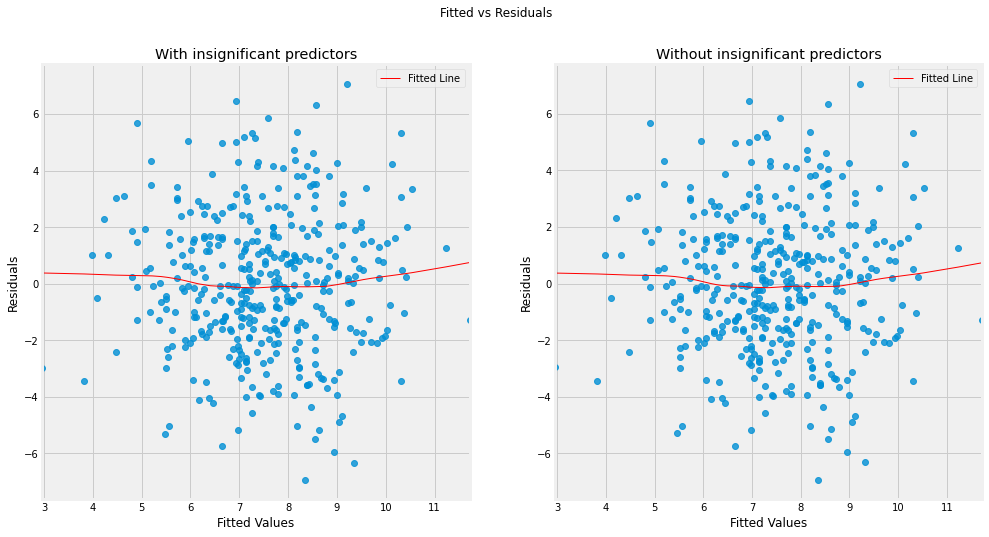

In [45]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
plt.suptitle('Fitted vs Residuals')
sns.regplot(x=cs_mlr.fittedvalues,y=cs_mlr.resid,lowess=True,scatter=True,line_kws={'color':'r','lw':1,'label':'Fitted Line'},ax = ax[0])
sns.regplot(x=cs_model.fittedvalues,y=cs_model.resid,lowess=True,scatter=True,line_kws={'color':'r','lw':1,'label':'Fitted Line'},ax = ax[1])
ax[0].set_title('With insignificant predictors')
ax[1].set_title('Without insignificant predictors')
for i in range(2):
  ax[i].set_xlabel('Fitted Values')
  ax[i].set_ylabel('Residuals')
  ax[i].legend(loc='best')
plt.show()

**Observation**
- Not much difference in the fit of the model.
- Model still shows a slight U pattern.
- The variance of the residuals are not constant.

### (G) Using the model from (E) obtain 95% Confidance Intervals for the coefficients.

In [0]:
ci = cs_model.conf_int(alpha=0.05,cols=None)

In [47]:
ci

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


### (H) Is there evidence of outlier or High leverage observations in model from (E)?

In [0]:
# Residuals
model_resid = cs_model.resid
# Fitted Values
model_fitted = cs_model.fittedvalues
# Standardized Residuals
model_norm_residuals = cs_model.get_influence().resid_studentized_internal
# model leverage points
model_leverage = cs_model.get_influence().hat_matrix_diag
# cooks distance
model_cook = cs_model.get_influence().cooks_distance[0]

In [0]:
# Helper plot function
def graph(formula, x_range, label=None):
  x = x_range
  y = formula(x)
  plt.plot(x,y,ls='--',lw=1,color='red',label=label)

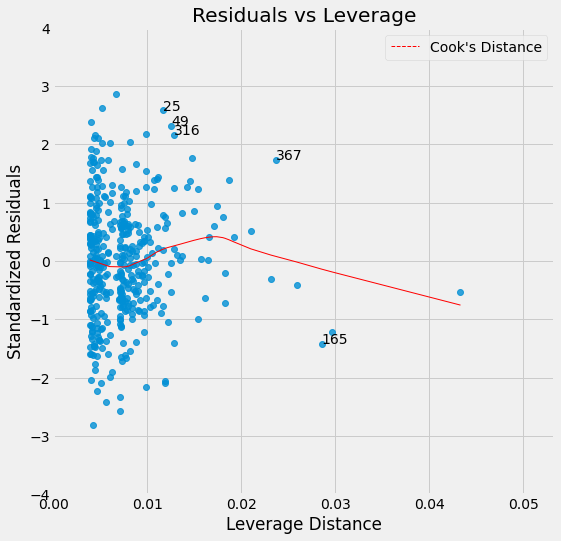

In [50]:
from matplotlib import style
style.use('fivethirtyeight')
# Residual vs Leverage plot
plt.figure(figsize=(8,8))
plt.title('Residuals vs Leverage')
sns.regplot(y=model_norm_residuals,x=model_leverage,lowess=True,scatter=True,line_kws={'color':'r','lw':1})
plt.xlabel('Leverage Distance')
plt.ylabel('Standardized Residuals')
plt.xlim(0,max(model_leverage)+0.01)
plt.ylim(-4,4)
# Annotations
leverage_top_5 = np.flip(np.argsort(model_cook,0))[:5]
for i in leverage_top_5:
  plt.annotate(i,xy=[model_leverage[i],model_norm_residuals[i]])
# Cooks Distance
p = len(cs_model.params)

graph(lambda x:((0.5*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50),'Cook\'s Distance')
graph(lambda x:((1*p*(1-x))/x),np.linspace(0.001,max(model_leverage),50))
plt.legend(loc='best')
plt.show()

**Observation**
- There are top 5 observation points of leverage in this model

In [51]:
print(f'The Top 5 Leverage Obervation points are {leverage_top_5}')

The Top 5 Leverage Obervation points are [ 25 367  49 316 165]
